In [81]:
# Regression Tree & Random Forest

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [83]:
# Importing the dataset
df = pd.read_csv('nt_var4_prep.csv', sep=';')

In [84]:
df

,ActualPower,Max Capacity,Location 2,Location 4,Location 6,Location 8
0,8.491,43.5,0.718,0.970,0.874000,0.902
1,11.232,43.5,0.776,1.072,0.975000,0.985
2,8.989,43.5,0.862,1.240,1.122000,1.103
3,5.969,43.5,0.984,1.448,1.296000,1.230
4,4.637,43.5,1.116,1.627,1.440000,1.308
...,...,...,...,...,...,...
312,27.630,43.5,5.644,5.716,5.061000,4.836
313,26.432,43.5,6.042,6.137,5.157000,4.750
314,27.282,43.5,6.573,6.747,7.196924,4.716
315,28.285,43.5,7.268,7.558,5.693000,4.856


In [85]:
# Splitting the dataset into the Training set and Test set
#В качестве объясняемой переменной берём все строки и столбец ActualPower
#В качестве объясняющих переменных берём все строки и следующие столбцы: Max Capacity, Location 2, Location 4, Location 6, Location 8
#Для проверки прогнозного качества модели разделим все наблюдения на обучающую (80%) и тестовую выборки (20%).
X = df.iloc[:, 1:6].values
y = df.iloc[:, 0].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [86]:
# Fitting Tree to the Training set (Location 4)
# Построение дерева решений от фактора Location 4
from sklearn.tree import DecisionTreeRegressor
sdt = DecisionTreeRegressor(max_leaf_nodes =10).fit(X_train[:, 2:3], y_train)

In [87]:
# Predicting the Test set results
y_pred = sdt.predict(X_test[:, 2:3])

In [88]:
#Coefficient of determination R^2
train_mod = []
train_mod.append(sdt.score(X_train[:, 2:3], y_train))
test_mod = []
test_mod.append(sdt.score(X_test[:, 2:3], y_test))
sdt.score(X_train[:, 2:3], y_train), sdt.score(X_test[:, 2:3], y_test)
#Коэффициент детерминации на обучающей выборке (0,33) больше, чем на тестовой (0,04).Качество модели очень низкое.

(0.33381242179118653, 0.04137529828865749)

In [89]:
# Mean squared error
from sklearn.metrics import mean_squared_error
train_mse =[]
train_mse.append(mean_squared_error(y_train, sdt.predict(X_train[:, 2:3])))
test_mse = []
test_mse.append(mean_squared_error(y_test, y_pred))
mean_squared_error(y_train, sdt.predict(X_train[:, 2:3])), mean_squared_error(y_test, y_pred)

(82.3363693045632, 111.30873386134988)

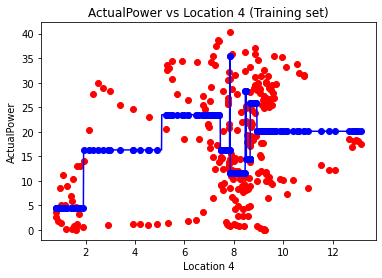

In [90]:
# Visualising the Training set results
X_grid = np.arange(min(X[:, 2:3]), max(X[:, 2:3]), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, sdt.predict(X_grid), color = 'blue')
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], sdt.predict(X_train[:, 2:3]), 'bo')
plt.title('ActualPower vs Location 4 (Training set)')
plt.xlabel('Location 4')
plt.ylabel('ActualPower')
plt.show()

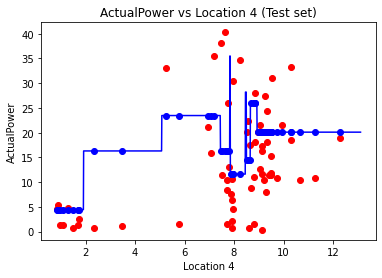

In [91]:
# Visualising the Test set results
X_grid = np.arange(min(X[:, 2:3]), max(X[:, 2:3]), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, sdt.predict(X_grid), color = 'blue')
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], sdt.predict(X_test[:, 2:3]), 'bo')
plt.title('ActualPower vs Location 4 (Test set)')
plt.xlabel('Location 4')
plt.ylabel('ActualPower')
plt.show()

In [92]:
# Fitting Tree to the Training set 
# Построение дерева решений на всех объясняющих переменных
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_leaf_nodes=5).fit(X_train, y_train)

In [93]:
# Predicting the Test set results
y_pred = dt.predict(X_test)

In [94]:
# Coefficient of determination R^2
# В модели дерева решений на всех объясняющих переменных коэффициент детерминации выше и на обучающей и на тестовой выборке. Модель является
#переобученной, так как коэффициент детерминации на обучающей выборке  выше, чем на тестовой
train_mod.append(dt.score(X_train, y_train))
test_mod.append(dt.score(X_test, y_test))
dt.score(X_train, y_train), dt.score(X_test, y_test)

(0.4974172561980619, 0.21702962871408005)

In [95]:
# Mean squared error
from sklearn.metrics import mean_squared_error
train_mse.append(mean_squared_error(y_train, dt.predict(X_train)))
test_mse.append(mean_squared_error(y_test, y_pred))
mean_squared_error(y_train, dt.predict(X_train)), mean_squared_error(y_test, y_pred)
# В модели дерева решений на всех объясняющих переменных среднеквадратическая ошибка ниже и на обучающей и на тестовой выборке.

(62.115896112980984, 90.91299287740395)

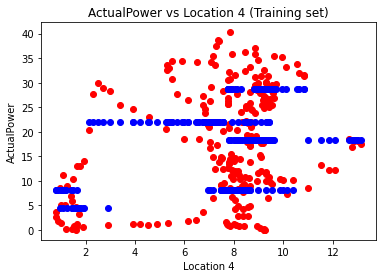

In [96]:
# Visualising the Training set results
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], dt.predict(X_train), 'bo')
plt.title('ActualPower vs Location 4 (Training set)')
plt.xlabel('Location 4')
plt.ylabel('ActualPower')
plt.show()

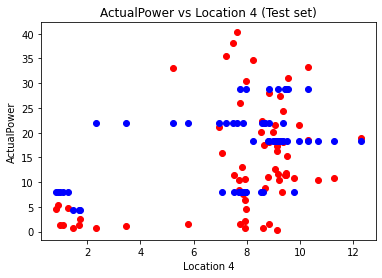

In [97]:
# Visualising the Test set results
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], dt.predict(X_test), 'bo')
plt.title('ActualPower vs Location 4 (Test set)')
plt.xlabel('Location 4')
plt.ylabel('ActualPower')
plt.show()

In [98]:
# Fitting Random Forest to the Training set
# Построение случайного леса на всех объясняющих переменных
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 8, random_state = 0).fit(X_train, y_train)

In [99]:
# Predicting the Test set results
y_pred = rf.predict(X_test)

In [100]:
# Predicting the Test set results
y_pred = rf.predict(X_test)

In [101]:
# Coefficient of determination R^2
train_mod.append(rf.score(X_train, y_train))
test_mod.append(rf.score(X_test, y_test))
rf.score(X_train, y_train), rf.score(X_test, y_test)
# В модели случайного леса,построеннгой на всех объясняющих переменных коэффициент детерминации выше и на обучающей и на тестовой выборке,
# чем в модели дерева решений
# Модель является переобученной, так как коэффициент детерминации на обучающей выборке  выше, чем на тестовой

(0.9326466150602543, 0.36784535979261546)

In [102]:
# Mean squared error
from sklearn.metrics import mean_squared_error
train_mse.append(mean_squared_error(y_train, dt.predict(X_train)))
test_mse.append(mean_squared_error(y_test, y_pred))
mean_squared_error(y_train, rf.predict(X_train)), mean_squared_error(y_test, y_pred)

(8.324431973381916, 73.40133472509766)

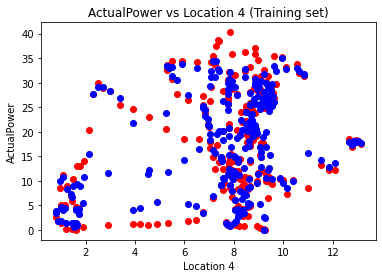

In [103]:
# Visualising the Training set results
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], rf.predict(X_train), 'bo')
plt.title('ActualPower vs Location 4 (Training set)')
plt.xlabel('Location 4')
plt.ylabel('ActualPower')
plt.show()

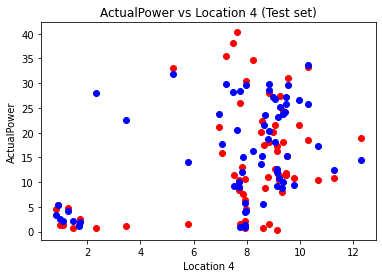

In [104]:
# Visualising the Test set results
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], rf.predict(X_test), 'bo')
plt.title('ActualPower vs Location 4 (Test set)')
plt.xlabel('Location 4')
plt.ylabel('ActualPower')
plt.show()

In [105]:
# Fitting Tree to the Training set (with optimized factors)
# Построение дерева решений на наиболее значимых факторах : Max Capacity, Location 4, Location 6
from sklearn.tree import DecisionTreeRegressor
dl = DecisionTreeRegressor(max_leaf_nodes = 5).fit(X_train[:, [0,2,3]], y_train)

In [106]:
# Predicting the Test set results
y_pred = dl.predict(X_test[:, [0,2,3]])

In [107]:
# Coefficient of determination R^2
train_mod.append(dl.score(X_train[:, [0,2,3]], y_train))
test_mod.append(dl.score(X_test[:, [0,2,3]], y_test))
dl.score(X_train[:, [0,2,3]], y_train), dl.score(X_test[:, [0,2,3]], y_test)
# Коэффициент детерминации ниже, чем в модели случайного леса

(0.456998538225035, 0.1881180054205912)

In [108]:
# Mean squared error
from sklearn.metrics import mean_squared_error
train_mse.append(mean_squared_error(y_train, dl.predict(X_train[:, [0,2,3]])))
test_mse.append(mean_squared_error(y_test, y_pred))
mean_squared_error(y_train, dl.predict(X_train[:, [0,2,3]])), mean_squared_error(y_test, y_pred)
# Среднеквадратическая ошибка выше, чем в модели случайного леса

(67.1113817670245, 94.27000650007562)

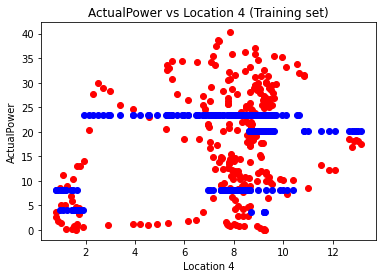

In [109]:
# Visualising the Training set results
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], dl.predict(X_train[:, [0,2,3]]), 'bo')
plt.title('ActualPower vs Location 4 (Training set)')
plt.xlabel('Location 4')
plt.ylabel('ActualPower')
plt.show()

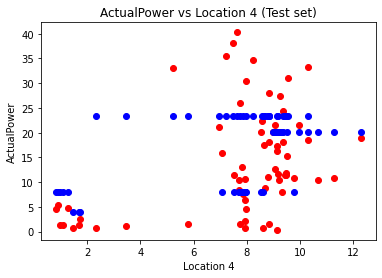

In [111]:
# Visualising the Test set results
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], dl.predict(X_test[:, [0,2,3]]), 'bo')
plt.title('ActualPower vs Location 4 (Test set)')
plt.xlabel('Location 4')
plt.ylabel('ActualPower')
plt.show()

In [112]:
# Creating dataset with metrics
model=['sdt', 'dt', 'rf', 'dl']
metrics_df=pd.DataFrame()
metrics_df['model']=model
metrics_df['train_r2']=train_mod
metrics_df['test_r2']=test_mod
metrics_df['train_mse']=train_mse
metrics_df['test_mse']=test_mse
metrics_df

,model,train_r2,test_r2,train_mse,test_mse
0,sdt,0.333812,0.041375,82.336369,111.308734
1,dt,0.497417,0.217030,62.115896,90.912993
2,rf,0.932647,0.367845,62.115896,73.401335
3,dl,0.456999,0.188118,67.111382,94.270007


In [40]:
#Лучшей моделью из всех рассмотренных с наибольшим коэффициентом детерминации на обучающей и тестовой выборке, а также наименьшей 
#среднеквадратической ошибкой на обучающей и тестовой выборке является модель случайного леса.